<a href="https://colab.research.google.com/github/LokeshVadlamudi/DeepLearningClass/blob/master/kerasLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('/content/drive/My Drive/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**we have multiple columns that doesnt make sense for prediction**

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
corr = df.corr()

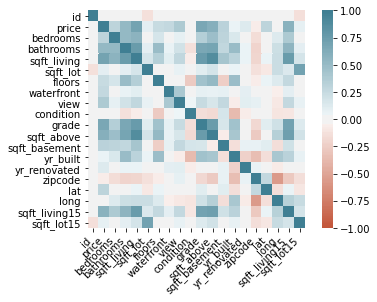

In [8]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
input = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade']]
input

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
0,3,1.00,1180,5650,1.0,3,7
1,3,2.25,2570,7242,2.0,3,7
2,2,1.00,770,10000,1.0,3,6
3,4,3.00,1960,5000,1.0,5,7
4,3,2.00,1680,8080,1.0,3,8
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,3,8
21609,4,2.50,2310,5813,2.0,3,8
21610,2,0.75,1020,1350,2.0,3,7
21611,3,2.50,1600,2388,2.0,3,8


In [0]:
output = df[['price']]

In [11]:
output

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [0]:
input = input.values

In [13]:
input

array([[3.00e+00, 1.00e+00, 1.18e+03, ..., 1.00e+00, 3.00e+00, 7.00e+00],
       [3.00e+00, 2.25e+00, 2.57e+03, ..., 2.00e+00, 3.00e+00, 7.00e+00],
       [2.00e+00, 1.00e+00, 7.70e+02, ..., 1.00e+00, 3.00e+00, 6.00e+00],
       ...,
       [2.00e+00, 7.50e-01, 1.02e+03, ..., 2.00e+00, 3.00e+00, 7.00e+00],
       [3.00e+00, 2.50e+00, 1.60e+03, ..., 2.00e+00, 3.00e+00, 8.00e+00],
       [2.00e+00, 7.50e-01, 1.02e+03, ..., 2.00e+00, 3.00e+00, 7.00e+00]])

In [0]:
output = output.values

In [15]:
output

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [0]:
from sklearn.preprocessing import StandardScaler
s_input = StandardScaler()
input = s_input.fit_transform(input)
s_output = StandardScaler()
output = s_output.fit_transform(output)

In [17]:
input

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.915427  ,
        -0.62918687, -0.55883575],
       [-0.39873715,  0.1756067 ,  0.53363434, ...,  0.93650577,
        -0.62918687, -0.55883575],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.915427  ,
        -0.62918687, -1.40958711],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ...,  0.93650577,
        -0.62918687, -0.55883575],
       [-0.39873715,  0.50022075, -0.52252773, ...,  0.93650577,
        -0.62918687,  0.29191561],
       [-1.47395936, -1.77207762, -1.15404732, ...,  0.93650577,
        -0.62918687, -0.55883575]])

In [18]:
output

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(input,output,test_size=.2,random_state=0)

In [20]:
X_train

array([[-0.39873715, -1.44746357, -0.55519254, ..., -0.915427  ,
         0.90755354, -0.55883575],
       [-0.39873715,  0.50022075, -0.32653889, ..., -0.915427  ,
         0.90755354,  0.29191561],
       [-0.39873715, -0.79823546, -1.07782944, ..., -0.915427  ,
        -0.62918687,  0.29191561],
       ...,
       [-0.39873715,  0.1756067 ,  0.3049807 , ..., -0.915427  ,
         0.90755354,  1.14266697],
       [ 0.67648506, -0.14900736,  0.31586896, ...,  0.93650577,
         0.90755354,  0.29191561],
       [ 0.67648506,  0.1756067 ,  0.32675723, ..., -0.915427  ,
        -0.62918687, -0.55883575]])

keras model creation


In [21]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from keras import layers, metrics
import keras

Using TensorFlow backend.


In [22]:
!pip3 install 'gast==0.2.2'
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
network = Sequential()
network.add(Dense(18, activation="relu",input_shape=(7,)))
network.add(Dropout(0.3))
network.add(Dense(9, activation="relu"))
network.add(Dropout(0.1))
network.add(Dense(3, activation="relu"))
network.add(Dense(1))

In [25]:
network.compile(loss='mean_squared_error', optimizer=Adam(), metrics=[metrics.mae])
print(network.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 18)                144       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 171       
_________________________________________________________________
dropout_2 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 349
Trainable params: 349
Non-trainable params: 0
________________________________________________________

In [26]:
network.fit(X_train, y_train, epochs=30, batch_size = 32, shuffle=True)

train_score = network.evaluate(X_train, y_train, verbose=0)
valid_score = network.evaluate(X_test, y_test, verbose=0)

Epoch 1/30
17290/17290 [==============================] - 1s 47us/step - loss: 0.6164 - mean_absolute_error: 0.5212
Epoch 2/30
17290/17290 [==============================] - 1s 38us/step - loss: 0.4986 - mean_absolute_error: 0.4549
Epoch 3/30
17290/17290 [==============================] - 1s 37us/step - loss: 0.4724 - mean_absolute_error: 0.4415
Epoch 4/30
17290/17290 [==============================] - 1s 38us/step - loss: 0.4692 - mean_absolute_error: 0.4366
Epoch 5/30
17290/17290 [==============================] - 1s 37us/step - loss: 0.4314 - mean_absolute_error: 0.4282
Epoch 6/30
17290/17290 [==============================] - 1s 37us/step - loss: 0.4373 - mean_absolute_error: 0.4269
Epoch 7/30
17290/17290 [==============================] - 1s 37us/step - loss: 0.4200 - mean_absolute_error: 0.4216
Epoch 8/30
17290/17290 [==============================] - 1s 38us/step - loss: 0.4269 - mean_absolute_error: 0.4210
Epoch 9/30
17290/17290 [==============================] - 1s 38us/step -

In [0]:
import matplotlib.pyplot as plt


In [0]:
input1 = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade']]
output1 = df[['price']]
X_train1,X_test1,y_train1,y_test1 = train_test_split(input1,output1,test_size=.2,random_state=0)

(0.0, 2000000.0)

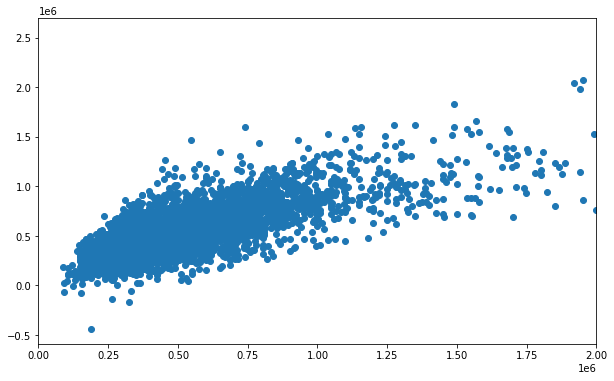

In [32]:
#using linear regression - 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train1,y_train1)
predictions = lm.predict(X_test1)
plt.figure(figsize=(10,6))
ax = plt.scatter(y_test1,predictions)
plt.xlim(0,2000000)